In [119]:
import os 
import matplotlib
import pandas  as pd 
import seaborn as sns 

In [124]:
country_military_spending = pd.read_csv('military_expenditures_in_shared_of_gdp.tsv', sep = '\t',    skiprows=5
)
# NATO members (as listed in your dataset — adjust names if needed)
nato_countries = [
    "United States of America", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia",
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]

# Load dataset
country_military_spending = pd.read_csv(
    "military_expenditures_in_shared_of_gdp.tsv",
    sep="\t",
    skiprows=5
)

# Keep only NATO members
nato_spending = country_military_spending[
    country_military_spending["Country"].isin(nato_countries)
]

# Reshape to long format
nato_long = nato_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Keep only numeric years
nato_long = nato_long[nato_long["Year"].str.isnumeric()]
nato_long["Year"] = nato_long["Year"].astype(int)
nato_long = nato_long[nato_long["Spending"] != "..."]

us_long = us_military_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Convert Year to int (if they are strings)
us_long = us_long[us_long["Year"].str.isnumeric()]

us_long["Year"] = us_long["Year"].astype(int)
us_long["Spending"] = (
    us_long["Spending"]
    .replace(r"%", "", regex=True)
    .astype(float)
)
us_long["Spending"] = us_long["Spending"].astype(float)

# Build a long-form dataframe for ALL countries (no NATO filter)



all_long = country_military_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Clean it the same way
all_long = all_long[all_long["Year"].astype(str).str.isnumeric()].copy()
all_long["Year"] = all_long["Year"].astype(int)

all_long = all_long[~all_long["Spending"].isin(["...", ". ."])].copy()
all_long["Spending"] = (
    all_long["Spending"].astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)
all_long = all_long[pd.to_numeric(all_long["Spending"], errors="coerce").notna()].copy()
all_long["Spending"] = all_long["Spending"].astype(float)

# Russia & China series (averages per year in case of duplicates)
russia_avg = (
    all_long[all_long["Country"] == "Russia"]
    .groupby("Year")["Spending"].mean().reset_index()
)
china_avg = (
    all_long[all_long["Country"] == "China"]
    .groupby("Year")["Spending"].mean().reset_index()
)

# List of European NATO countries (exclude US & Canada)
# European NATO members
european_nato = [
    "Albania",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Czechia",
    "Denmark",
    "Estonia",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "United Kingdom",
    "Türkiye"   # transcontinental but NATO member, listed as "Türkiye" in SIPRI
]

# Canada
canada_nato = ["Canada"]

# United States
us_nato = ["United States of America"]

europe_long = nato_long[nato_long["Country"].isin(european_nato)]



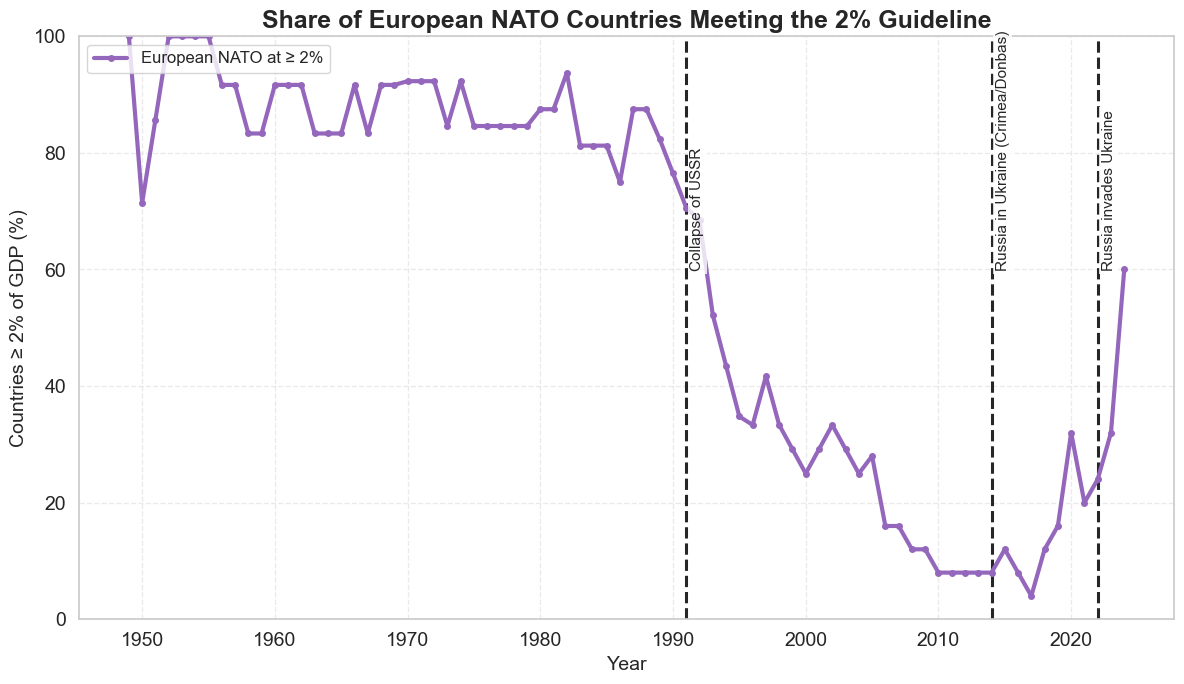

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to European NATO countries
eu = nato_long[nato_long["Country"].isin(european_nato)].copy()

# For each year: percentage of countries with Spending >= 2 (only among countries with data that year)
eu_yearly = (
    eu.groupby("Year")["Spending"]
      .agg(total=lambda s: s.notna().sum(),
           hits=lambda s: (s >= 2).sum())
      .reset_index()
)
eu_yearly["pct_above_2"] = eu_yearly["hits"] / eu_yearly["total"] * 100

# Plot
plt.figure(figsize=(12, 7))
plt.plot(
    eu_yearly["Year"], eu_yearly["pct_above_2"],
    linewidth=3, marker="o", markersize=4, color="#9467BD",  # purple (colorblind-friendly)
    label="European NATO at ≥ 2%"
)

events = [
    #(1991, "Collapse of USSR"),
   # (2001, "US invades Afghanistan"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine")
]
ax = plt.gca()

# Draw the vertical lines
for x, _ in events:
    ax.axvline(x=x, color="black", linestyle="--", linewidth=2.2, alpha=0.85, zorder=1)

# Place labels *inside* the plot, close to bottom
ymin, ymax = ax.get_ylim()
label_y = ymin + 0.1 * (ymax - ymin)   # 10% above bottom

for i, (x, label) in enumerate(events):
    ax.text(
        x + 0.3, label_y+,
        label,
        rotation=90,               # vertical text looks tidy near lines
        fontsize=11,
        va="bottom", ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=2),
        zorder=5
    )

# Formatting
plt.title("Share of European NATO Countries Meeting the 2% Guideline", fontsize=18, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Countries ≥ 2% of GDP (%)", fontsize=14)
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper left", frameon=True)

# Bigger ticks
ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=14)

plt.tight_layout()
plt.show()


In [78]:
import pandas as pd

# Load the CSV
file_path = "social_spending_ssocx.csv"
df = pd.read_csv(file_path)

# Select and rename relevant columns
df_clean = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].rename(
    columns={
        "Reference area": "Country",
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "Public social spending (% of GDP)"
    }
)

# Convert year to integer
df_clean["Year"] = df_clean["Year"].astype(int)

# Convert spending to numeric
df_clean["Public social spending (% of GDP)"] = pd.to_numeric(df_clean["Public social spending (% of GDP)"], errors="coerce")

print(df_clean.head())

   Country  Year  Public social spending (% of GDP)
0  Romania  1980                                NaN
1  Romania  1981                                NaN
2  Romania  1982                                NaN
3  Romania  1983                                NaN
4  Romania  1984                                NaN


In [79]:
df_clean = df_clean.dropna()
df_clean

,Country,Year,Public social spending (% of GDP)
91,Norway,2006,19.404
92,Norway,2007,19.520
93,Norway,2008,19.169
94,Norway,2009,22.415
95,Norway,2010,22.001
...,...,...,...
1901,Costa Rica,2018,12.434
1902,Costa Rica,2019,12.326
1903,Costa Rica,2020,14.372
1904,Costa Rica,2021,12.701


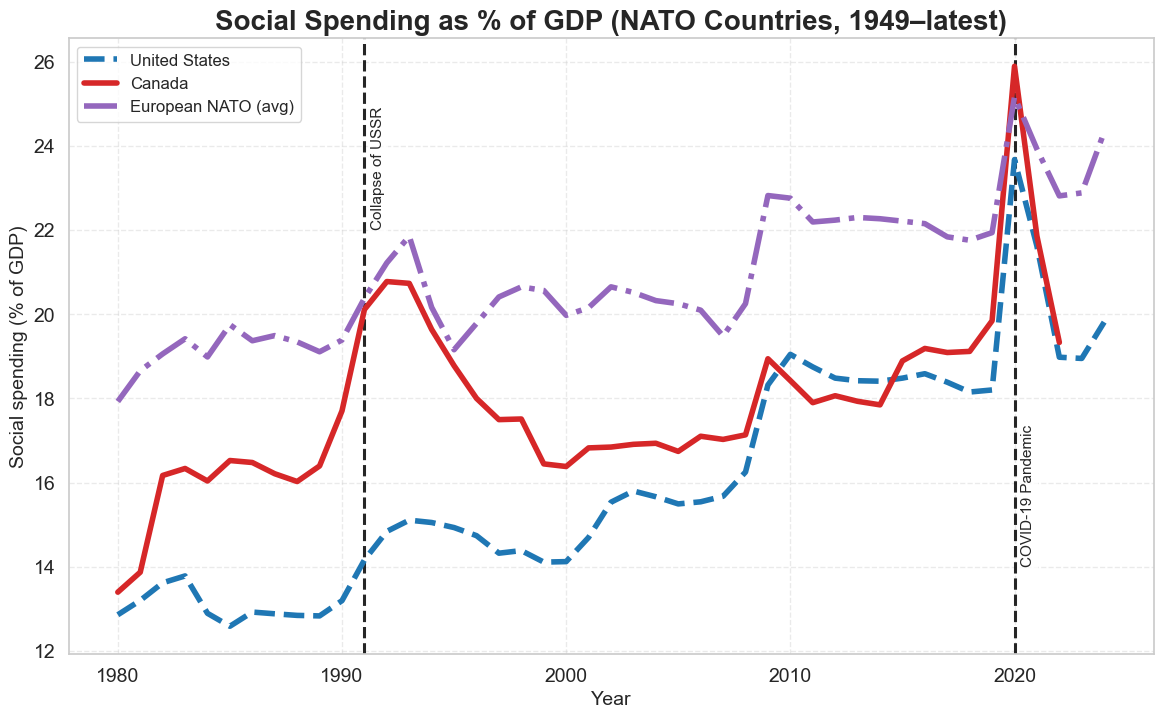

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_clean

# Full NATO list you gave
nato_countries = [
    "United States", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia",
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]

# Filter only NATO countries present in dataset
df_nato = df[df["Country"].isin(nato_countries)].copy()

# Filter for Year >= 1949
df_nato = df_nato[df_nato["Year"] >= 1949]

# Split categories
us = df_nato[df_nato["Country"] == "United States"]
us = us.sort_values(by = 'Year')
canada = df_nato[df_nato["Country"] == "Canada"]
canada = canada.sort_values(by = 'Year')

# European subset (exclude US and Canada)
europe = df_nato[~df_nato["Country"].isin(["United States","Canada"])]
europe = europe.sort_values(by = 'Year')

# Compute average across European NATO members by year
europe_avg = europe.groupby("Year")["Public social spending (% of GDP)"].mean().reset_index()


set_pubstyle()
plt.figure()

events = [
    (1991, "Collapse of USSR"),
   # (2001, "US invades Afghanistan"),
    (2020, "COVID-19 Pandemic"),
]
ax = plt.gca()

# Draw the vertical lines
for x, _ in events:
    ax.axvline(x=x, color="black", linestyle="--", linewidth=2.2, alpha=0.85, zorder=1)

# Place labels *inside* the plot, close to bottom
ymin, ymax = ax.get_ylim()
#label_y = ymin + 0.1 * (ymax - ymin)   # 10% above bottom

for i, (x, label) in enumerate(events):
    if x == 2020:
        ax.text(
        x + 0.3, 14,
        label,
        rotation=90,               # vertical text looks tidy near lines
        fontsize=11,
        va="bottom", ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=2),
        zorder=5
    )
    else:
        ax.text(
            x + 0.3, 22,
            label,
            rotation=90,               # vertical text looks tidy near lines
            fontsize=11,
            va="bottom", ha="left",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=2),
            zorder=5
        )


# Plot

plt.plot(us["Year"], us["Public social spending (% of GDP)"], label="United States", color="#1F77B4",linestyle="--",linewidth=4,)
plt.plot(canada["Year"], canada["Public social spending (% of GDP)"], label="Canada", color="#D62728",linewidth=4,)
plt.plot(europe_avg["Year"], europe_avg["Public social spending (% of GDP)"], label="European NATO (avg)",color="#9467BD", linewidth=4, linestyle="-.",)

plt.title("Social Spending as % of GDP (NATO Countries, 1949–latest)")
plt.xlabel("Year")
plt.ylabel("Social spending (% of GDP)")
#plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper left", frameon=True)

# Bigger ticks
ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=14)

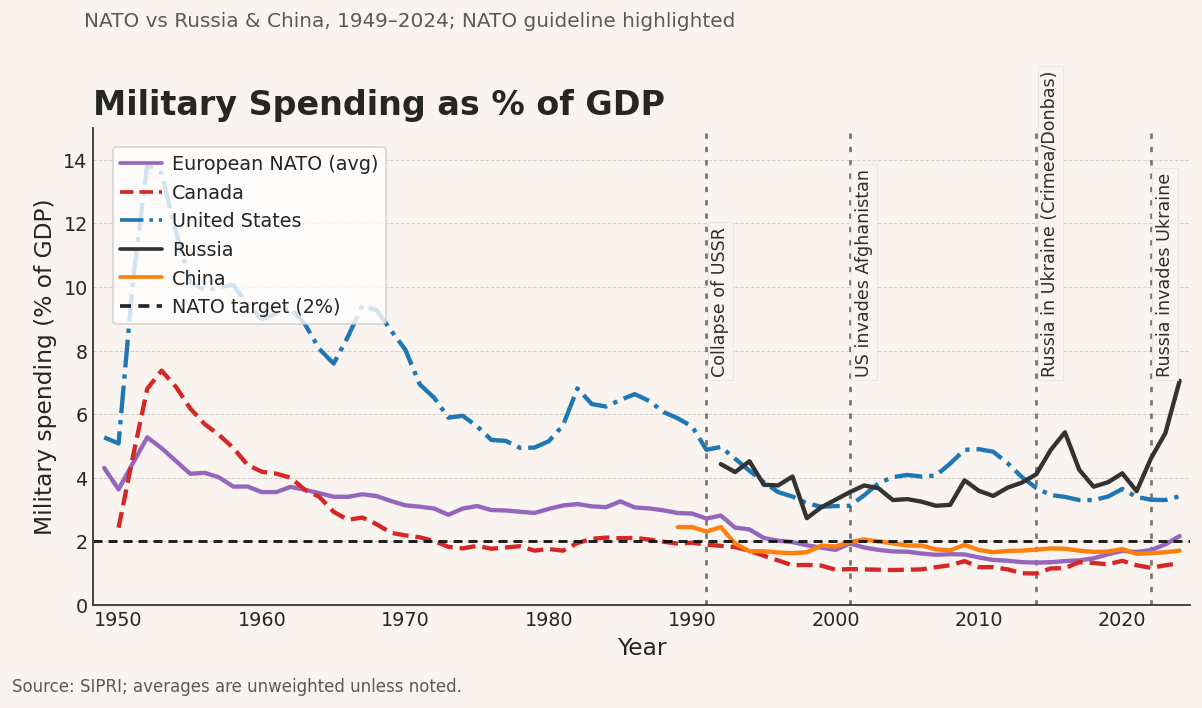

In [125]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# -----------------------
# Economist / FT-like Matplotlib style
# -----------------------
def set_pubstyle_econ_ft(base_fontsize=12):
    mpl.rcParams.update({
        # Typography
        "font.family": "DejaVu Sans",        # swap to 'IBM Plex Sans' / 'Source Sans 3' if installed
        "font.size": base_fontsize,
        "axes.titlesize": base_fontsize * 1.6,
        "axes.labelsize": base_fontsize * 1.25,
        "legend.fontsize": base_fontsize * 0.95,
        "xtick.labelsize": base_fontsize * 1.0,
        "ytick.labelsize": base_fontsize * 1.0,

        # Lines & grid
        "axes.grid": True,
        "grid.linestyle": "-",
        "grid.linewidth": 0.6,
        "grid.alpha": 0.35,
        "axes.axisbelow": True,

        # Spines
        "axes.spines.top": False,
        "axes.spines.right": False,

        # Figure
        "figure.dpi": 120,
        "savefig.dpi": 300,
        "savefig.bbox": "tight",

        # Legend
        "legend.frameon": False,
        "legend.loc": "upper left",

        # Tick params
        "xtick.major.size": 0,
        "ytick.major.size": 0,
        "xtick.minor.size": 0,
        "ytick.minor.size": 0,
    })

def economist_axis_touches(ax):
    # Subtle, slightly thicker left/bottom spines like FT/Economist
    ax.spines["left"].set_linewidth(1.1)
    ax.spines["bottom"].set_linewidth(1.1)
    ax.spines["left"].set_color("#3a3a3a")
    ax.spines["bottom"].set_color("#3a3a3a")
    ax.grid(axis="y", color="#8a8a8a")
    ax.grid(axis="x", visible=False)

def add_caption(fig, text, y_offset=0.02):
    # Small gray source/caption at the bottom-left
    fig.text(
        0.0, y_offset, text,
        ha="left", va="bottom",
        fontsize=10, color="#5a5a5a"
    )

# -----------------------
# Plot with Russia & China (colorblind-friendly palette)
# -----------------------
fig = plt.figure(figsize=(10, 6.2), facecolor="#f9f4ef")  # very light tan
ax = plt.gca()
ax.set_facecolor("#f9f4ef")  # match background for the plotting area


# European NATO average (purple)
ax.plot(
    europe_mean.index, europe_mean.values,
    linewidth=2.6, color="#9467BD", label="European NATO (avg)"
)

# Canada (red, dashed)
ax.plot(
    canada_avg["Year"], canada_avg["Spending"],
    linewidth=2.6, linestyle="--", color="#D62728", label="Canada"
)

# United States (blue, dash-dot)
ax.plot(
    us_avg["Year"], us_avg["Spending"],
    linewidth=2.6, linestyle="-.", color="#1F77B4", label="United States"
)

# Russia (near-black)
ax.plot(
    russia_avg["Year"], russia_avg["Spending"],
    linewidth=2.6, color="#333333", label="Russia"
)

# China (orange)
ax.plot(
    china_avg["Year"], china_avg["Spending"],
    linewidth=2.6, color="#FF7F0E", label="China"
)

# NATO guideline
ax.axhline(2, color="#0c0c0c", linestyle=(0, (3, 2)), linewidth=1.8, alpha=0.9, label="NATO target (2%)")

# Event markers (thin, tidy, labeled)
events = [
    (1991, "Collapse of USSR"),
    (2001, "US invades Afghanistan"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine"),
]

for x, _ in events:
    ax.axvline(x=x, color="#2f2f2f", linestyle=(0, (2, 3)), linewidth=1.6, alpha=0.65, zorder=1)

ymin, ymax = ax.get_ylim()
label_y = ymin + 0.06 * (ymax - ymin)   # low, but inside the chart

for x, label in events:
    ax.text(
        x + 0.35, label_y+6,
        label,
        rotation=90,
        fontsize=10.5,
        va="bottom", ha="left",
        color="#2f2f2f",
        bbox=dict(facecolor="#f9f4ef", edgecolor="#e5e5e5", linewidth=0.6, alpha=0.92, pad=2.2),
        zorder=5
    )

# Axes formatting
economist_axis_touches(ax)
ax.set_ylim(0, 15)
ax.set_xlabel("Year")
ax.set_ylabel("Military spending (% of GDP)")

# Title + subtitle (FT/Economist style: bold title, lighter subtitle)
title = "Military Spending as % of GDP"
subtitle = "NATO vs Russia & China, 1949–2024; NATO guideline highlighted"
ax.set_title(title, loc="left", fontweight="bold", pad=8)
fig.suptitle(subtitle, x=0.06, y=0.94, ha="left", fontsize=12, color="#5a5a5a")

# Legend (with opaque background for clarity)
leg = ax.legend(
    ncol=1,
    frameon=True,        # show background panel
    facecolor="white",   # solid white background
    edgecolor="#cccccc", # subtle gray border
    handlelength=2.2,
    handletextpad=0.5,
    borderaxespad=1.0,
    loc="upper left",
    fontsize=11.5
)

# Standardize line thickness inside legend
for line in leg.get_lines():
    line.set_linewidth(2.2)

# Ticks: nice integer years if your x is datetime/int; adjust as needed
ax.margins(x=0.01)
ax.tick_params(axis="both", which="major", labelsize=11.5)

# Caption / source note
add_caption(fig, "Source: SIPRI; averages are unweighted unless noted.")

plt.tight_layout(rect=[0, 0.04, 1, 0.92])
plt.show()


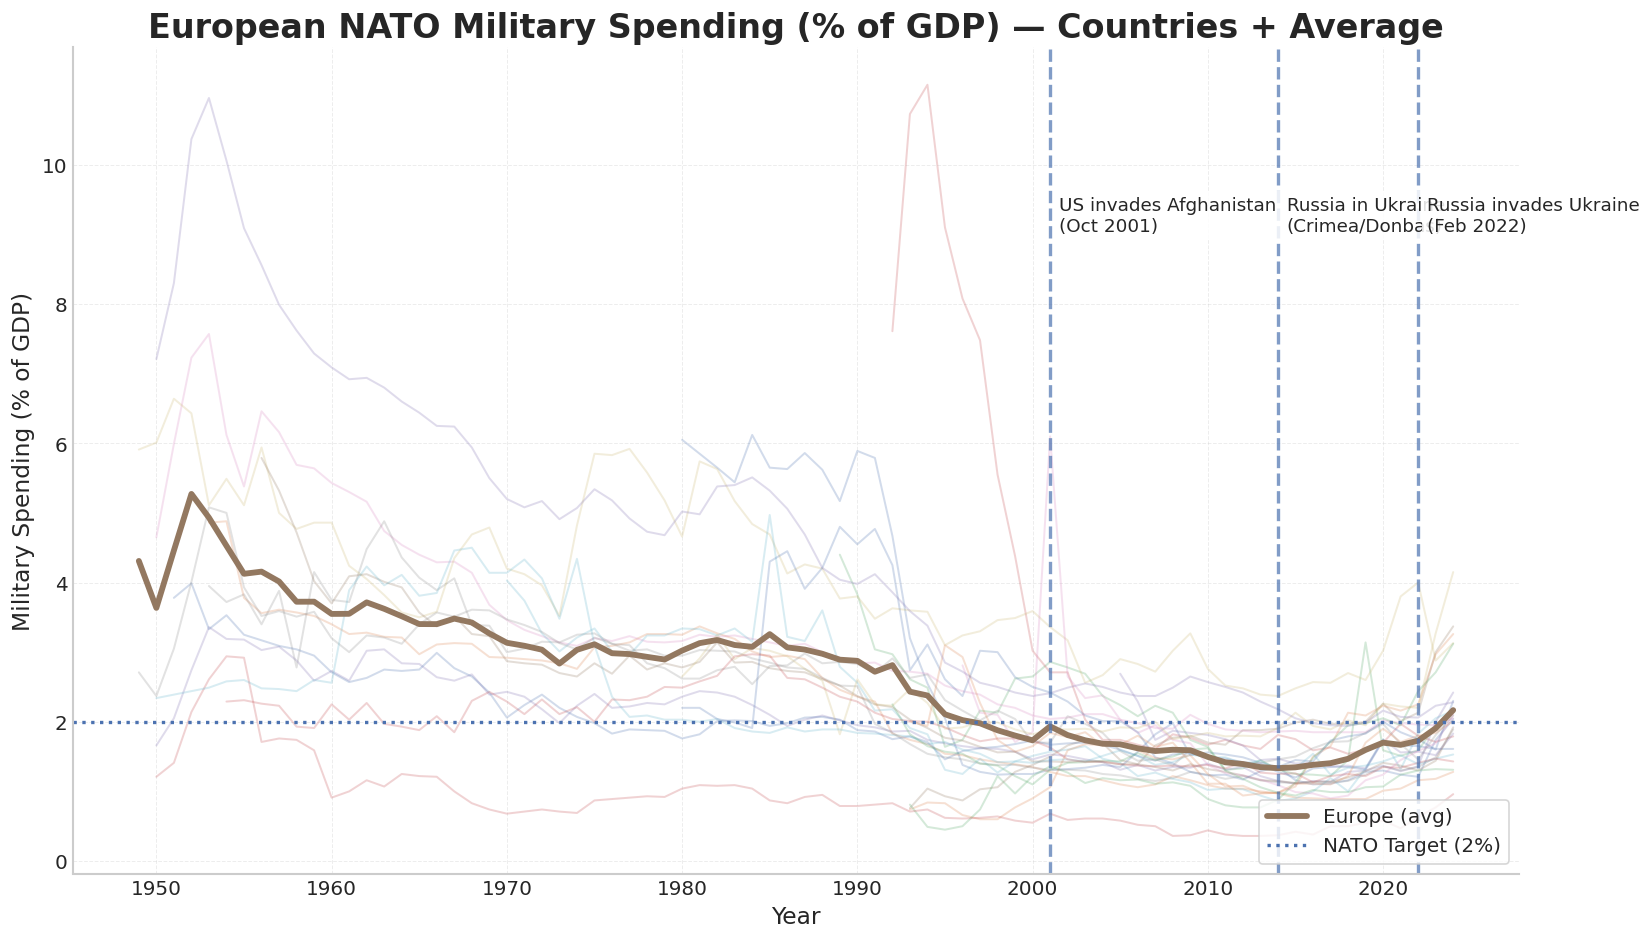

In [117]:
# -----------------------
# 5) Figure B (optional): European “spaghetti” plot
#     Faint lines for each country + bold European average
# -----------------------
want_spaghetti = True
if want_spaghetti:
    set_pubstyle()
    plt.figure()

    # Faint per-country lines to reduce clutter
    for c in sorted(european_nato):
        d = nato_long[(nato_long["Country"] == c)]
        if d.empty: 
            continue
        d = d.sort_values("Year")
        plt.plot(d["Year"], d["Spending"], linewidth=1.2, alpha=0.25)

    # Bold European average on top
    plt.plot(
        europe_mean.index, europe_mean.values,
        linewidth=3.5, label="Europe (avg)"
    )

    # 2% guideline
    plt.axhline(2, linestyle=":", linewidth=2, label="NATO Target (2%)")

    # Event markers (same placement approach)
    for x, _ in events:
        plt.axvline(x=x, linestyle="--", linewidth=2.0, alpha=0.7)

    plt.title("European NATO Military Spending (% of GDP) — Countries + Average")
    plt.xlabel("Year")
    plt.ylabel("Military Spending (% of GDP)")
    plt.legend(loc="lower right", frameon=True)

    # Label events below the top to avoid clutter
    ymin, ymax = plt.gca().get_ylim()
    for x, label in events:
        plt.text(
            x + 0.5, ymin + 0.82*(ymax - ymin),
            label, fontsize=11, va="top", ha="left",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.85, pad=3)
        )

    plt.tight_layout()
    plt.show()